# 00 - Explorando o Dataset



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("./data/questoes/questoes.json")

df.head()

,id,year,index,discipline,context,alternatives_introduction,correct_alternative,context_image,A,A_file,B,B_file,C,C_file,D,D_file,E,E_file,type
0,2009001,2009,1,ciencias-humanas,A atmosfera terrestre é composta pelos gases n...,"Considerando o texto, uma alternativa viável p...",C,None,Reduzir o calor irradiado pela Terra mediante ...,None,"Promover a queima da biomassa vegetal, respons...",None,"Reduzir o desmatamento, mantendo-se, assim, o ...",None,"Aumentar a concentração atmosférica de H2O, mo...",None,Remover moléculas orgânicas polares da atmosfe...,None,only-text
1,2009010,2009,10,ciencias-natureza,A fotossíntese é importante para a vida na Ter...,As informações sobre obtenção e transformação ...,C,None,O CO2 e a água são moléculas de alto teor ener...,None,Os carboidratos convertem energia solar em ene...,None,"A vida na Terra depende, em última análise, da...",None,O processo respiratório é responsável pela ret...,None,A produção de biomassa e de combustível fóssil...,None,only-text
2,2009100,2009,100,linguagens,![](https://enem.dev/2009/questions/100/8d5cbf...,Tendo em vista a segunda fala do personagem en...,E,./data/questoes/context_images\2009100.jpg,O entrevistado deseja convencer o jornalista a...,None,O principal objetivo do entrevistado é explica...,None,São utilizados diversos recursos da linguagem ...,None,O entrevistado deseja informar de modo objetiv...,None,O principal objetivo do entrevistado é evidenc...,None,context-image
3,2009102,2009,102,linguagens,Gênero dramático é aquele em que o artista usa...,Considerando o texto e analisando os elementos...,C,None,A criação do espetáculo teatral apresenta-se c...,None,O cenário onde se desenrola a ação cênica é co...,None,O texto cênico pode originar-se dos mais varia...,None,O corpo do ator na cena tem pouca importância ...,None,A iluminação e o som de um espetáculo cênico i...,None,only-text
4,2009103,2009,103,linguagens,"Saúde, no modelo atual de qualidade de vida, é...","A partir desse contexto, considera-se que uma ...",C,None,Apresenta uma postura regular.,None,Pode se exercitar por períodos curtos de tempo.,None,Pode desenvolver as atividades físicas do dia-...,None,Pode executar suas atividades do dia a dia com...,None,Pode exercer atividades físicas no final do di...,None,only-text


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529 entries, 0 to 2528
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         2529 non-null   int64 
 1   year                       2529 non-null   int64 
 2   index                      2529 non-null   int64 
 3   discipline                 2529 non-null   object
 4   context                    2394 non-null   object
 5   alternatives_introduction  2527 non-null   object
 6   correct_alternative        2529 non-null   object
 7   context_image              860 non-null    object
 8   A                          2403 non-null   object
 9   A_file                     126 non-null    object
 10  B                          2403 non-null   object
 11  B_file                     126 non-null    object
 12  C                          2403 non-null   object
 13  C_file                     126 non-null    object
 14  D       

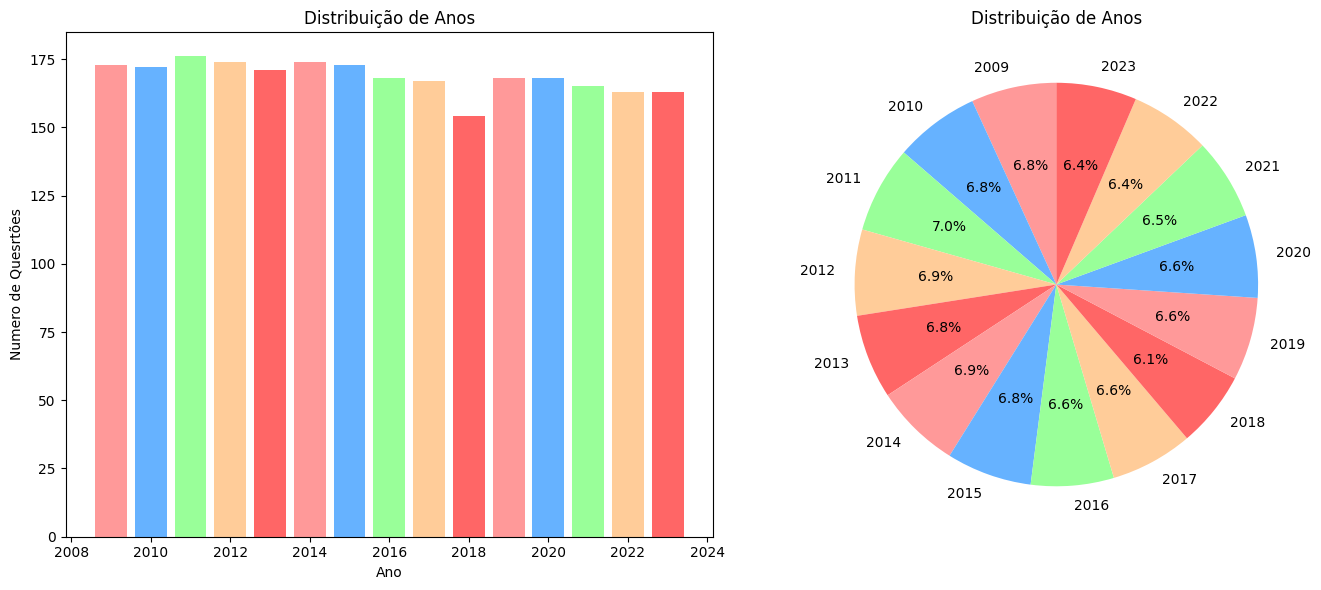

In [3]:
# Distribuição de Anos
distribuicao_anos = df['year'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras para a distribuição de anos
ax1.bar(distribuicao_anos.index, distribuicao_anos.values, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666'])
ax1.set_xlabel('Ano')
ax1.set_ylabel('Numero de Quesrtões')
ax1.set_title('Distribuição de Anos')

ax2.pie(distribuicao_anos.values, labels=distribuicao_anos.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666'], startangle=90)
ax2.set_title('Distribuição de Anos')

# Ajustar layout
plt.tight_layout()
plt.show()

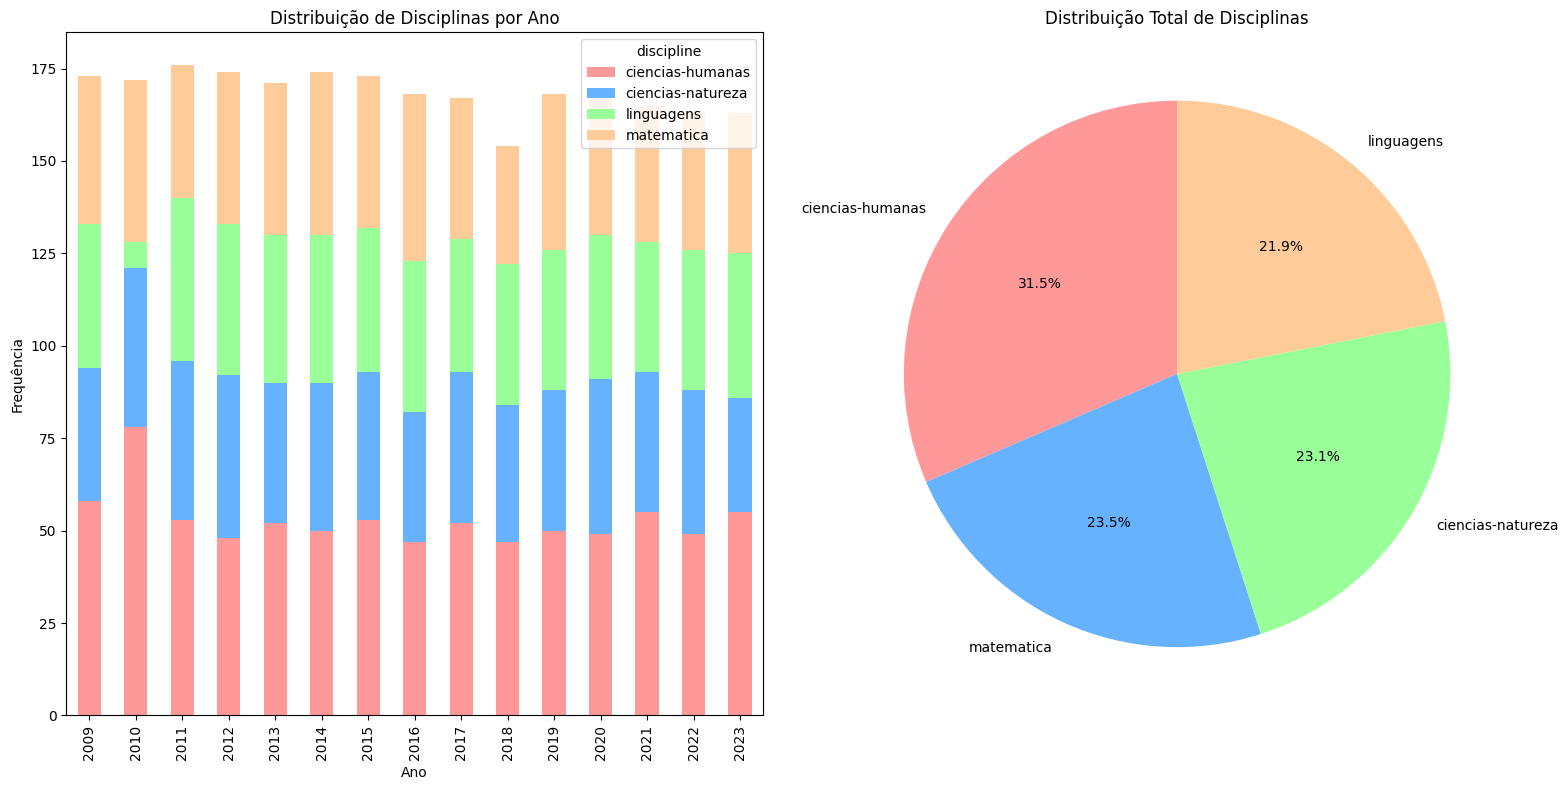

In [4]:
distribuicao_disciplinas_por_ano = df.groupby(['year', 'discipline']).size().unstack()

distribuicao_disciplinas_total = df['discipline'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

distribuicao_disciplinas_por_ano.plot(kind='bar', stacked=True, ax=ax1, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666'])
ax1.set_xlabel('Ano')
ax1.set_ylabel('Frequência')
ax1.set_title('Distribuição de Disciplinas por Ano')

# Gráfico de pizza para a distribuição total de disciplinas
ax2.pie(distribuicao_disciplinas_total.values, labels=distribuicao_disciplinas_total.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666'], startangle=90)
ax2.set_title('Distribuição Total de Disciplinas')

# Ajustar layout
plt.tight_layout()

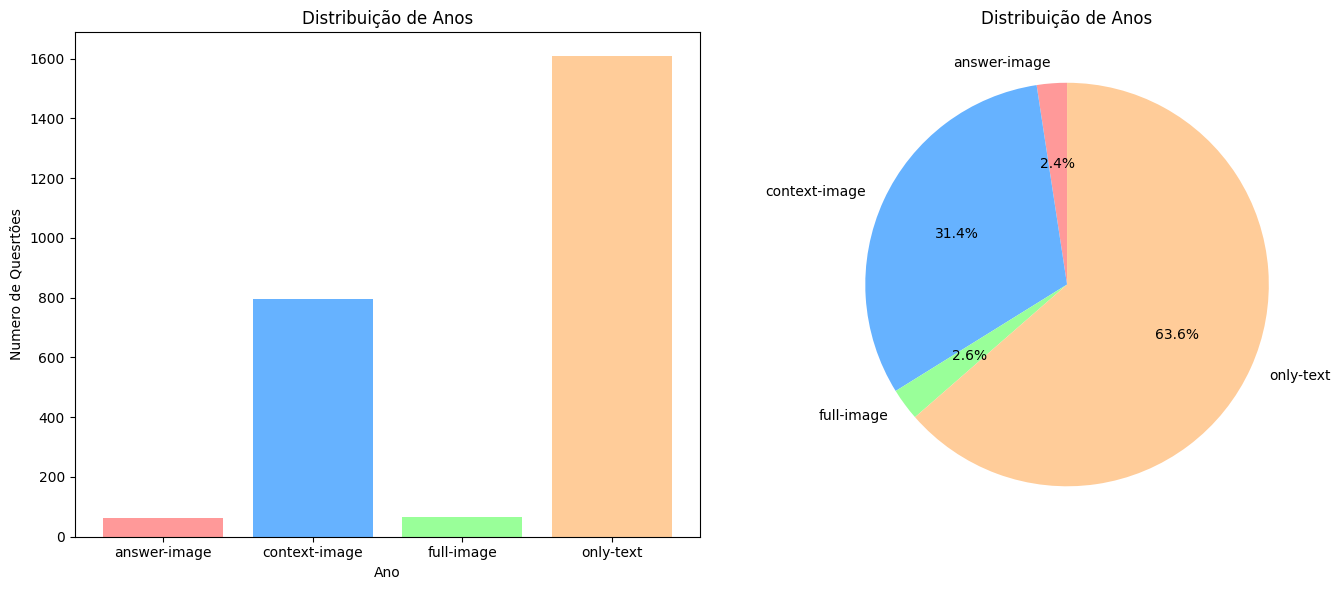

In [6]:
# Distribuição de Anos
distribuicao_types = df['type'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras para a distribuição de anos
ax1.bar(distribuicao_types.index, distribuicao_types.values, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666'])
ax1.set_xlabel('Ano')
ax1.set_ylabel('Numero de Quesrtões')
ax1.set_title('Distribuição de Anos')

ax2.pie(distribuicao_types.values, labels=distribuicao_types.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666'], startangle=90)
ax2.set_title('Distribuição de Anos')

# Ajustar layout
plt.tight_layout()
plt.show()